# Reuters - Exploratory Data Analysis

## Imports

In [1]:
from keras.datasets import reuters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

sns.set()

Using TensorFlow backend.


## Input data

In [2]:
mapping = {
    0: 'cocoa',
    1: 'grain',
    2: 'veg-oil',
    3: 'earn',
    4: 'acq',
    5: 'wheat',
    6: 'copper',
    7: 'housing',
    8: 'money-supply',
    9: 'coffee',
    10: 'sugar',
    11: 'trade',
    12: 'reserves',
    13: 'ship',
    14: 'cotton',
    15: 'carcass',
    16: 'crude',
    17: 'nat-gas',
    18: 'cpi',
    19: 'money-fx',
    20: 'interest',
    21: 'gnp',
    22: 'meal-feed',
    23: 'alum',
    24: 'oilseed',
    25: 'gold',
    26: 'tin',
    27: 'strategic-metal',
    28: 'livestock',
    29: 'retail',
    30: 'ipi',
    31: 'iron-steel',
    32: 'rubber',
    33: 'heat',
    34: 'jobs',
    35: 'lei',
    36: 'bop',
    37: 'zinc',
    38: 'orange',
    39: 'pet-chem',
    40: 'dlr',
    41: 'gas',
    42: 'silver',
    43: 'wpi',
    44: 'hog',
    45: 'lead'
}

In [3]:
def get_data():
    (x_train, y_train), (x_test, y_test) = reuters.load_data()

    train = pd.DataFrame({'text': x_train, 'label': y_train})
    test = pd.DataFrame({'text': x_test, 'label': y_test})

    word_index = reuters.get_word_index()

    index_to_word = {} 
    for key, value in word_index.items(): 
        index_to_word[value] = key

    train['text'] = train['text'].apply(lambda x: ' '.join(index_to_word.get(i, '') for i in x))
    test['text'] = test['text'].apply(lambda x: ' '.join(index_to_word.get(i, '') for i in x))

    # train['label'] = train['label'].apply(lambda x: mapping[x])
    # test['label'] = test['label'].apply(lambda x: mapping[x])
    return train[['text']], train['label'], test[['text']], test['label']

In [4]:
x_train, y_train, x_test, y_test = get_data()

## Explore data

In [5]:
print(f'Train shape: {x_train.shape[0]}')
print(f'Test  shape: {x_test.shape[0]}')

Train shape: 8982
Test  shape: 2246


In [6]:
x_train.head()

,text
0,the wattie nondiscriminatory mln loss for plc ...
1,the termination payment airport takes 6 visibi...
2,the lt dlrs demand 000 reuter dividend year lt...
3,the in currencies hit firms in has would seven...
4,the bleached could mln at world as holding for...


In [7]:
y_train.head()

0    3
1    4
2    3
3    4
4    4
Name: label, dtype: int64

In [8]:
y_train.nunique()

46

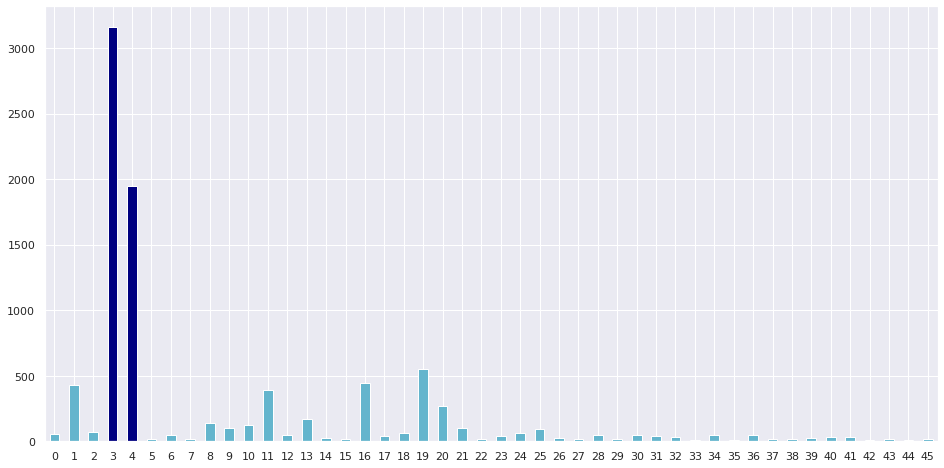

In [9]:
color = ['c'] * 46
color[3:4] = 2 * ['navy']
y_train.value_counts().sort_index().plot(kind='bar', figsize=(16, 8), color=color);
plt.xticks(rotation='horizontal');

In [10]:
y_test.nunique()

46

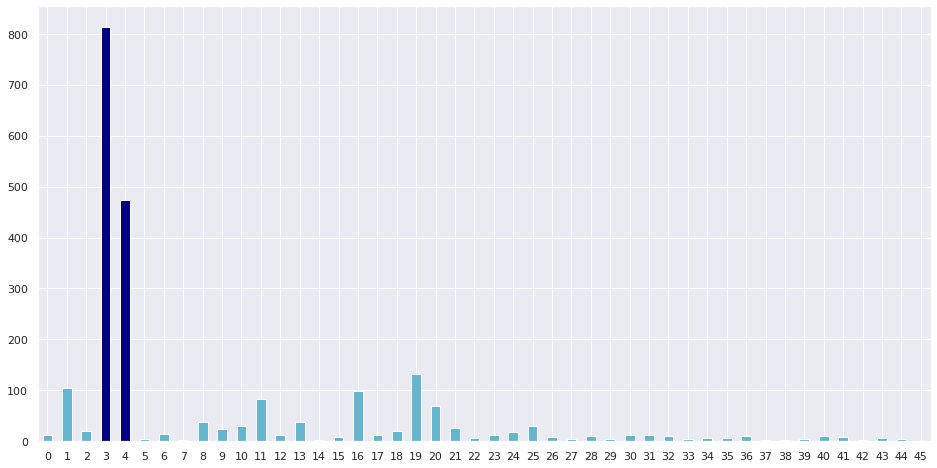

In [11]:
color = ['c'] * 46
color[3:4] = 2 * ['navy']
y_test.value_counts().sort_index().plot(kind='bar', figsize=(16, 8), color=color);
plt.xticks(rotation='horizontal');

Os rótulos estão desbalanceados, tendo maior frequência nos valores 3 e 4 tanto nos dados de treinamento quanto de teste que parecem possuir a mesma distribuição.

### Analisando a quantidade de caracteres das sentenças:

In [14]:
x_train['len'] = x_train['text'].apply(len)
x_test['len'] = x_test['text'].apply(len)

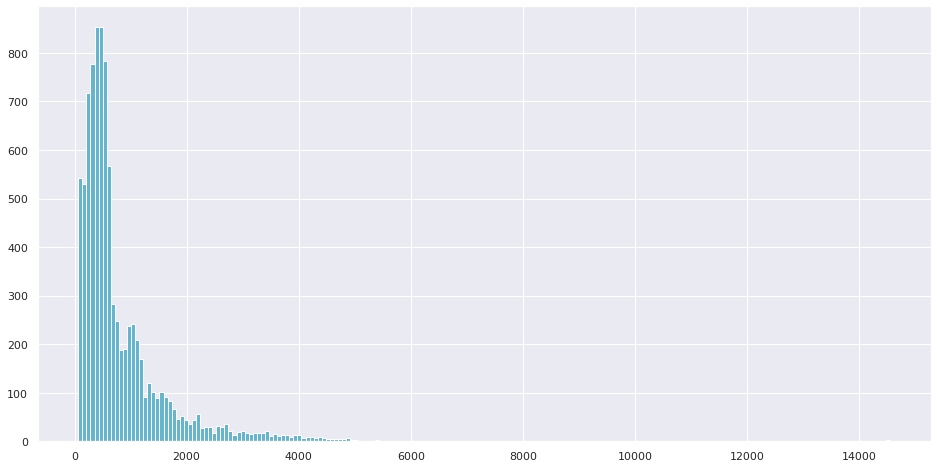

In [17]:
x_train['len'].hist(bins=200, figsize=(16, 8), color='c');

In [18]:
(x_train['len'] > 4000).sum()

97

In [19]:
(x_train['len'] > 5000).sum()

15

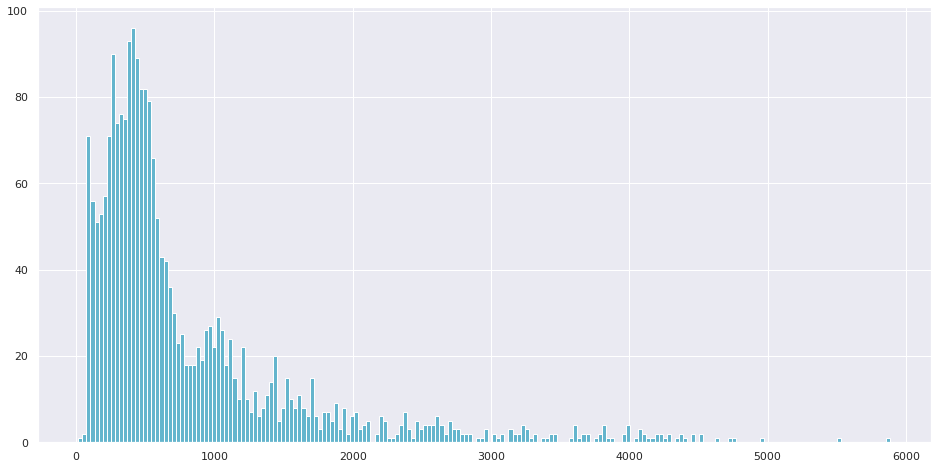

In [20]:
x_test['len'].hist(bins=200, figsize=(16, 8), color='c');

In [21]:
(x_test['len'] > 4000).sum()

30

In [22]:
(x_test['len'] > 5000).sum()

2

A distribuição da quantidade de caracteres das setenças é inclinada a esquerda, tendo a maior parte do texto até 1000 caracteres, porém há a presença de sentenças maiores acima de 6000 caracteres apenas nos dados de treinamento.

### Analisando a quantidade de palavras:

In [25]:
x_train['len'] = x_train['text'].apply(lambda x: len(x.split()))
x_test['len'] = x_test['text'].apply(lambda x: len(x.split()))

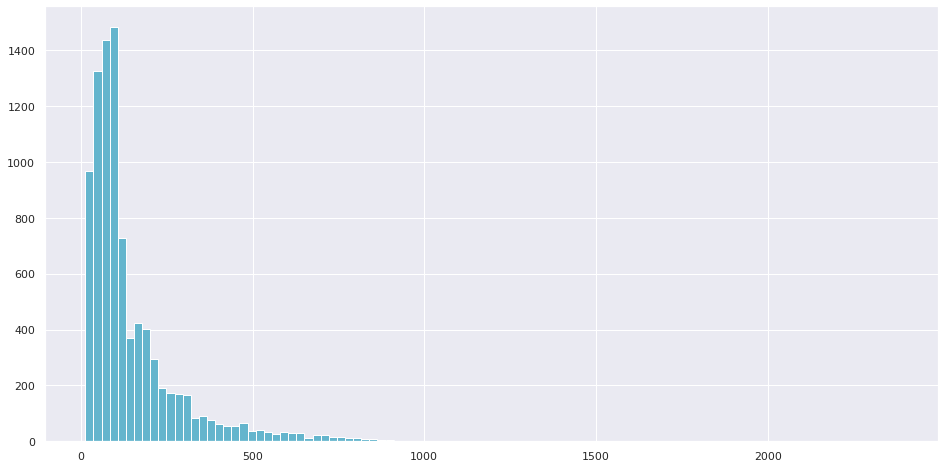

In [27]:
x_train['len'].hist(bins=100, figsize=(16, 8), color='c');

In [29]:
(x_train['len'] > 1000).sum()

6

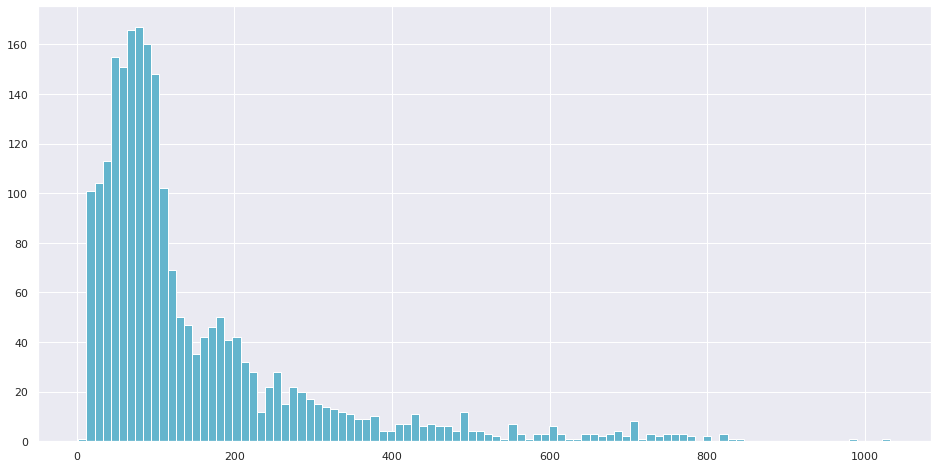

In [28]:
x_test['len'].hist(bins=100, figsize=(16, 8), color='c');

### Analisando a quantidade de palavras únicas:

In [30]:
x_train['len'] = x_train['text'].apply(lambda x: len(set(x.split())))
x_test['len'] = x_test['text'].apply(lambda x: len(set(x.split())))

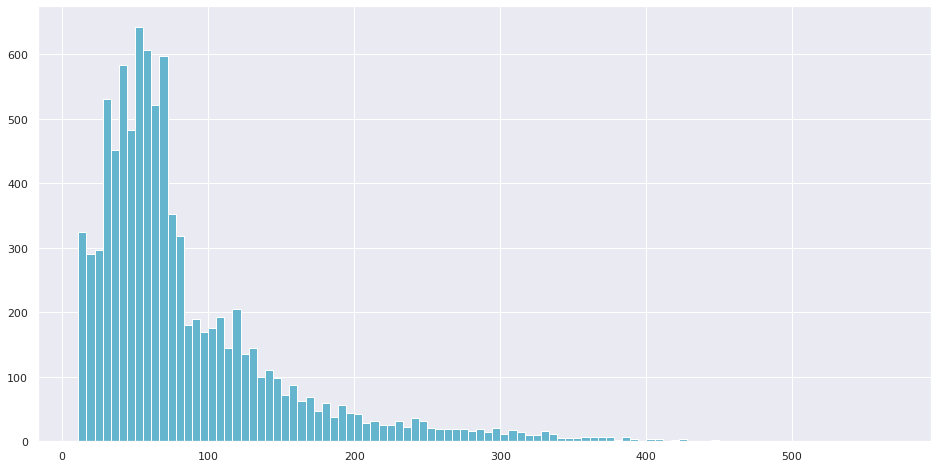

In [31]:
x_train['len'].hist(bins=100, figsize=(16, 8), color='c');

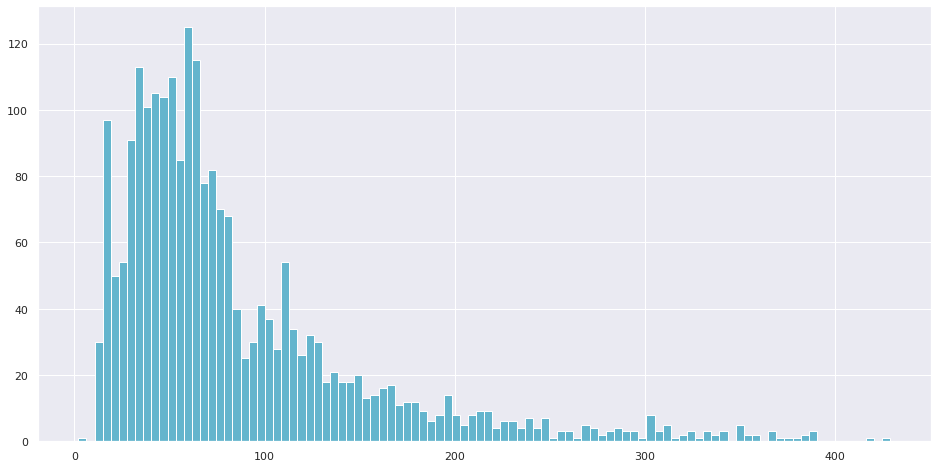

In [32]:
x_test['len'].hist(bins=100, figsize=(16, 8), color='c');

## Plotando as nuvens de palavras:

In [21]:
from wordcloud import WordCloud

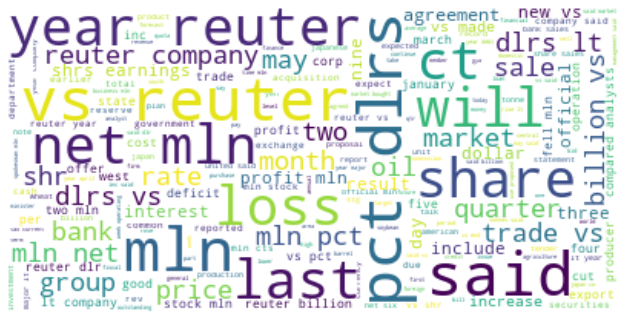

In [22]:
wordcloud = WordCloud(max_font_size=40, max_words=2000, relative_scaling=0, 
                      repeat=False, background_color="white")
wordcloud_geral = wordcloud.generate(' '.join(x_train['text']))

plt.figure(figsize=(11, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

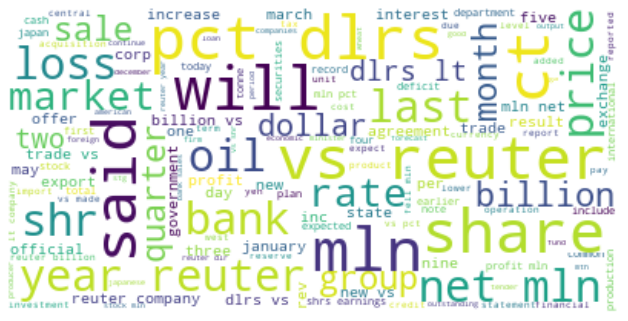

In [23]:
wordcloud = WordCloud(max_font_size=40, max_words=2000, relative_scaling=0, 
                      repeat=False, background_color="white")
wordcloud_geral = wordcloud.generate(' '.join(x_test['text']))

plt.figure(figsize=(11, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Modeling

In [6]:
vectorizer = TfidfVectorizer().fit(x_train['text'])

x_train = vectorizer.transform(x_train['text'])
x_test = vectorizer.transform(x_test['text'])

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.7773820124666073
precision: 0.7772437106241369
recall:    0.7773820124666073
f1_score:  0.768589409349604


In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.7021371326803205
precision: 0.7029115867380236
recall:    0.7021371326803205
f1_score:  0.6987477082898849


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.6869991095280499
precision: 0.6746171873008382
recall:    0.6869991095280499
f1_score:  0.6580675475780305


In [29]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.47684772929652713
precision: 0.4379893199269858
recall:    0.47684772929652713
f1_score:  0.4033866974408067


In [30]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.8058771148708815
precision: 0.8072389617872199
recall:    0.8058771148708815
f1_score:  0.7978887799041362


In [31]:
from sklearn.svm import SVC

model = SVC().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.3619768477292965
precision: 0.13102723829203833
recall:    0.3619768477292965
f1_score:  0.19240743851187844


## Feature importance

In [14]:
x_train = pd.DataFrame(x_train.toarray(), columns=vectorizer.get_feature_names())
x_test = pd.DataFrame(x_test.toarray(), columns=vectorizer.get_feature_names())

In [16]:
x_train.shape[1]

26562

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_train, y_train)

In [36]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print(f"{f + 1}. {x_train.columns[indices[f]]} ({importances[indices[f]]})")
    if importances[indices[f]] == 0.0:
        break

Feature ranking:
1. reuter (0.19531549859943112)
2. profit (0.04668854827652348)
3. one (0.02997475535119345)
4. about (0.028558034796486727)
5. national (0.021022685691944536)
6. up (0.01924153819155625)
7. rate (0.015912841055592465)
8. offer (0.01530370805431117)
9. both (0.013493540562832083)
10. state (0.012200202571904638)
11. ltd (0.01143045646140808)
12. 21 (0.011169487162669047)
13. tonnes (0.01064570622810587)
14. made (0.010281449192080848)
15. make (0.010201824371731073)
16. current (0.009765920113093214)
17. february (0.009031278778364508)
18. year (0.008988486441128832)
19. now (0.008609106758604032)
20. been (0.008171285005425064)
21. morning (0.006775687115159252)
22. this (0.005922569618184082)
23. volume (0.005915332577329579)
24. but (0.005892102189438229)
25. meet (0.005855603658134122)
26. tomorrow (0.005740250529568868)
27. program (0.005618512763337637)
28. at (0.005589890856869061)
29. 300 (0.005540958856613059)
30. option (0.005327166559917897)
31. is (0.005301